# Regularized Regression in Python

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [125]:
# load dataset
df = pd.read_csv('boston.csv', sep=',')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Data yang digunakan adalah : 

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollars
* PTRATIO - pupil-teacher ratio by town
* BLACK - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

### General Information and Missing Values

In [3]:
#check data type and null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### Observation:

* Data contains 13 columns and 506 rows
* All columns are numerical and we have no null value
* All columns have been in appropiate data type

### Check Duplicated Values

In [6]:
df.duplicated().sum()

0

### Statistical Summary

In [4]:
#check central tendency of each dataset's column
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Observation:

* Column zn apparently shows proportion in 0 - 100 scale/percentage
* chas apparently has binary value. 0 for tract does not bound river, and 1 for otherwise
* age also shows percentage 2.9-100%, shows the proportion of owner-occupied units built prior to 1940
* Overall, the minimum and maximum number in each column make sense

### Univariate Analyst (Box Plot and KDE Plot)

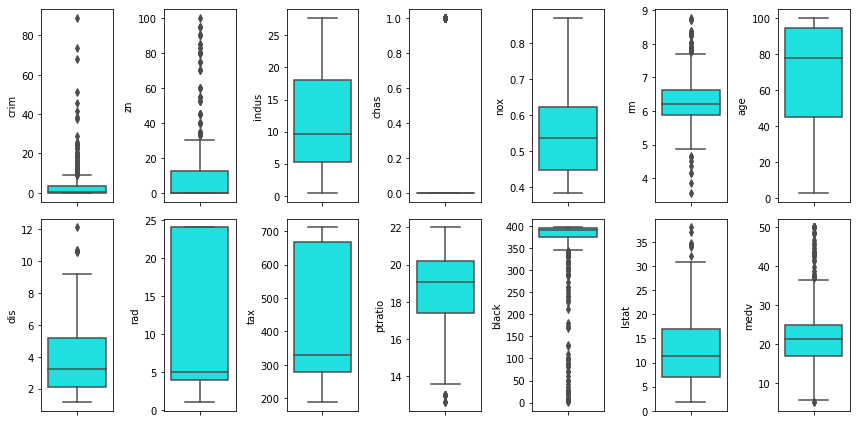

In [15]:
# box plot to detect outliers
plt.figure(figsize=(12, 6))

features = df.columns.tolist()
for i in range(len(features)):
    plt.subplot(2, len(features)//2, i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()


#### Observation:

* column indus, nox, age, rad, and tax have no prominent outliers
* column chas is binary type column, with value 0 is much more frequent in dataset. 
* other columns show significant amount of outliers based on this boxplot

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

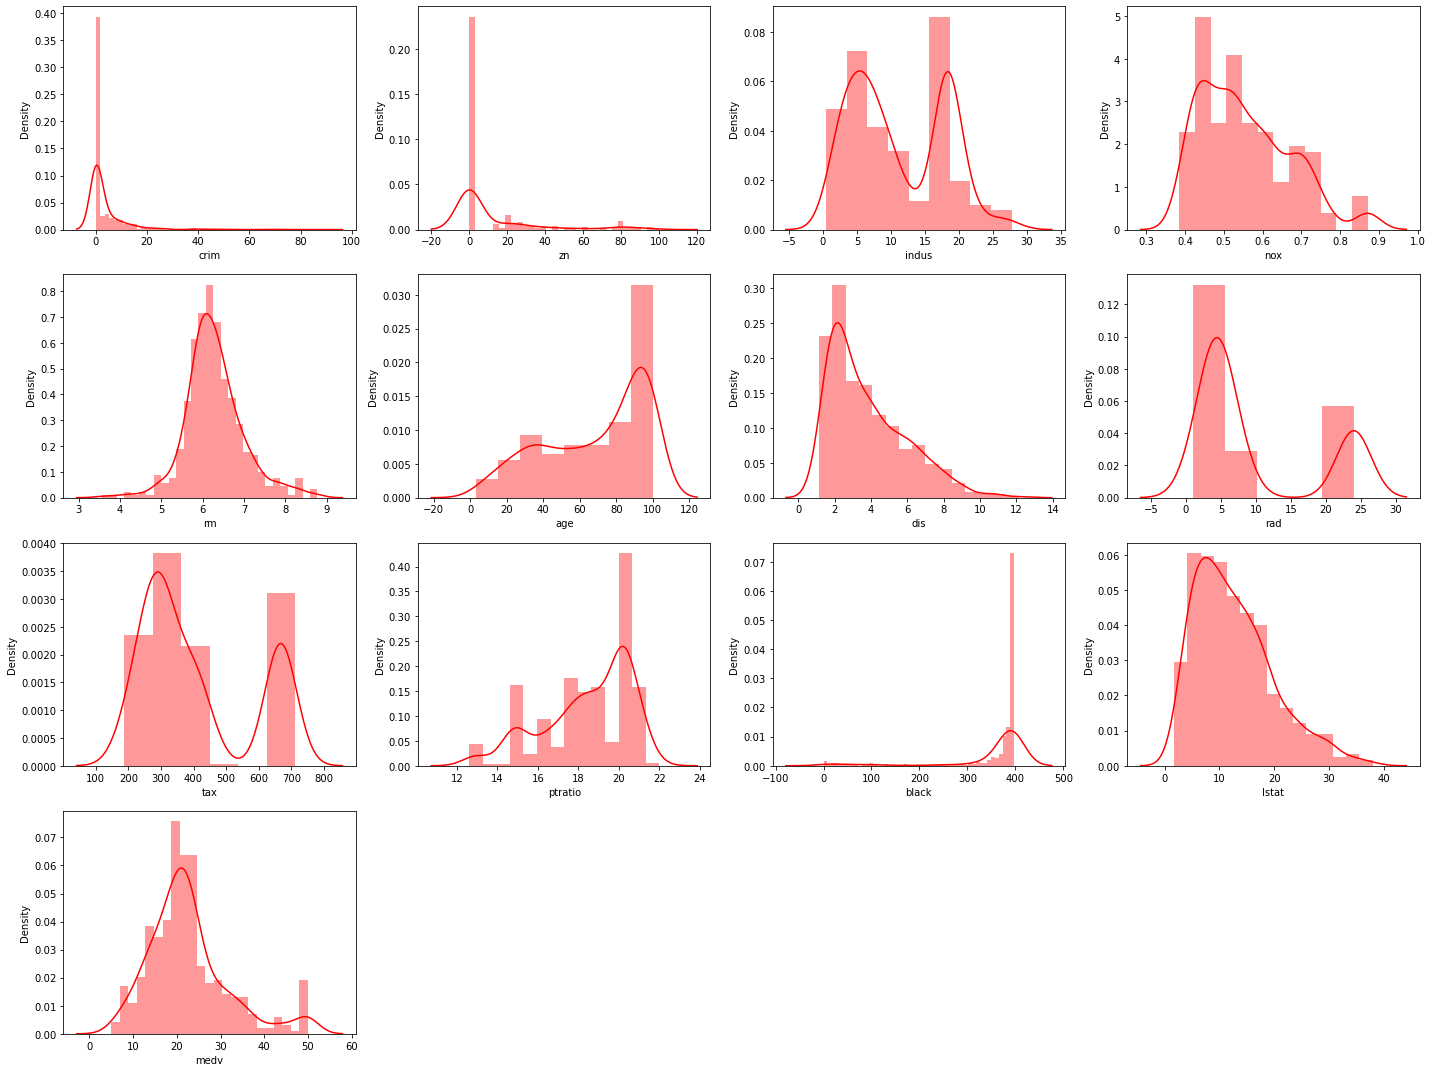

In [32]:
#draw kde plot to see each column distribution
plt.figure(figsize=(20, 15))

features = df.columns.tolist()
for i in range(len(features)):
    plt.subplot(4, len(features)//4 + 1, i+1)
    sns.distplot(x=df[features[i]], color='red')
    plt.xlabel(features[i])
    plt.tight_layout()

### Split Data: Train - Validate - Test

In [126]:
#split train-validation-test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

#split data to pretrain-test
feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size = 0.20, random_state = 123)

#split pretrain data to train and validation
feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size = 0.20, random_state = 123)

### Feature Selection (Multicollinearity Check)

In [127]:
#check multicollinearity
#calculate vif score for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])], index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.642330
2,zn,2.152891
3,indus,4.034963
4,chas,1.058616
5,nox,4.561194
6,rm,1.779242
7,age,3.216204
8,dis,4.088284
9,rad,6.934431
10,tax,8.476699


There are several features with moderate-high vif scores (>4):
1. indus, 
2. nox, 
3. dis, 
4. rad, and 
5. tax.

### Feature Selection (Draw Correlation Plot)

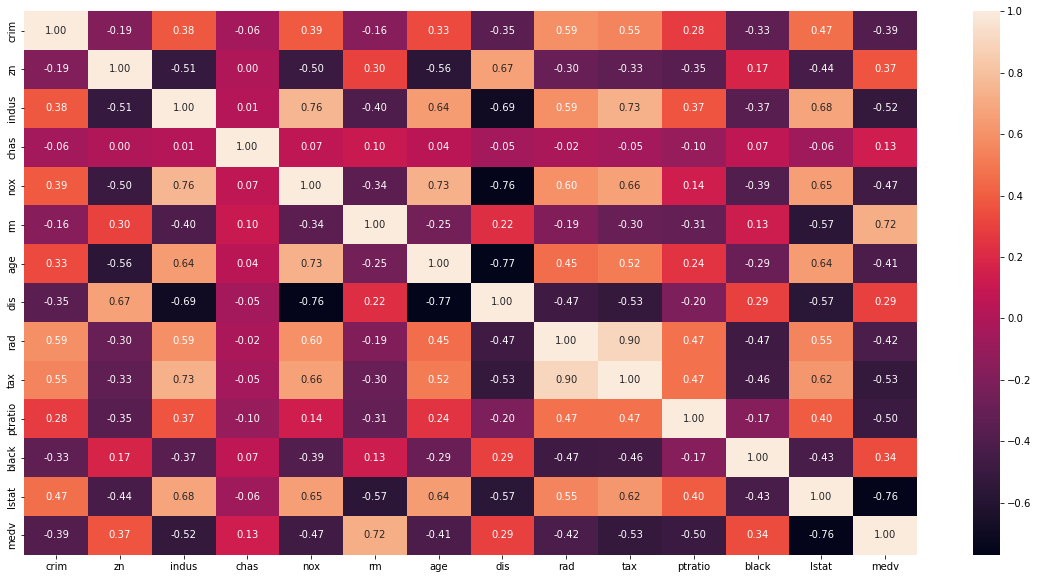

In [128]:
#draw a correlation heatmap
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

dengan threshold > 85%, maka feature yang mempunyai strong correlation:
* rad dengan tax

kita akan drop antara rad dengan tax, pilih yang correlation dengan target (medv) paling rendah:
* rad = 0.42
* tax = 0.53

maka kita akan drop rad

### Drop Multicollinear Features

In [129]:
#drop multicollinear features
feature_df_train = feature_df_train.drop(columns=['rad'])
feature_df_validation = feature_df_validation.drop(columns=['rad'])
feature_df_test = feature_df_test.drop(columns=['rad'])

### Recheck VIF Score 

In [130]:
#recheck the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])], index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.542075
2,zn,2.151156
3,indus,3.696278
4,chas,1.048313
5,nox,4.411496
6,rm,1.736304
7,age,3.201255
8,dis,4.084197
9,tax,3.515910
10,ptratio,1.762945


Masih ada feature yang mempunyai skor VIF moderate, yaitu nox dan dis. Namun dalam heatmap sebelumnya, correlation feature nox dan dis dengan feature lainnya seperti indus, age, dan dis masih kurang dari threshold, yaitu 80%

## Ridge

### Train Multiple Models

In [131]:
#Ridge
#Train data using different alpha

from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=123)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=123)
ridge_reg_one = Ridge(alpha=1, random_state=123)
ridge_reg_ten = Ridge(alpha=10, random_state=123)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)

Ridge(alpha=10, random_state=123)

### Find the Best Model on Validation Set (based on RMSE score)

In [132]:
#find the best alpha using validation dataset
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 6.055127130960353
RMSE of Ridge regression model with alpha = 0.1 is 6.06192926541537
RMSE of Ridge regression model with alpha = 1.0 is 6.099307013368063
RMSE of Ridge regression model with alpha = 10 is 6.116144076722637


The best alpha with the lowest RMSE is 0.01, so we use this alpha value

### Model Evaluation

In [133]:
#evaluate the model
ridge_best = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,20.780905
1,crim,-0.077105
2,zn,0.041274
3,indus,0.003598
4,chas,1.284732
5,nox,-9.770945
6,rm,5.020428
7,age,-0.022175
8,dis,-1.437753
9,tax,-0.001638


#### Interpretation:

Dengan asumsi feature lain bernilai tetap
* penambahan 1 poin pada feature crim (criminal rate), akan menurunkan (karena nilai minus) harga rumah sebesar 0.077105 atau 77.105 dollar.
* kolom chas terdiri dari nilai biner, 1 jika dekat dengan Charles river, 0 jika tidak. Maka jika rumah dekat dengan Charles river, harga rumah akan naik sebesar 1.284732 atau sebesar 1284.732 dollar
* penambahan 1 poin pada feature rm, medv atau harga rumah bertambah 5.02 poin. Artinya bertambahnya jumlah 1 kamar akan menaikkan harga rumah sekitar 5020 dollar

### Diagnostic Study

R-squared for training data is 0.7685540689807909


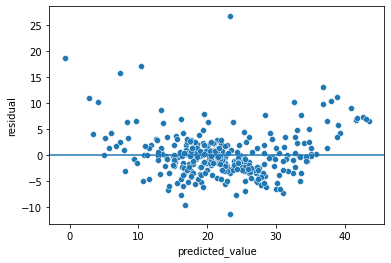

In [142]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_df_train)
print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

# calculate residuals
residual = y_df_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

#### Assumption:

* Linear relationship
* Not have constant variance
* Independent observation

### Training Error

In [134]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_df_train)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('Normalized RMSE for traning data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))/(max(y_df_train)-min(y_df_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

R-squared for training data is 0.7685540689807909
RMSE for training data is 4.257981693943844
Normalized RMSE for traning data is 0.09462181542097431
MAE for training data is 2.9383317157053415
MAPE for training data is 0.15313019110083595


#### Interpretation:

* 76.85% data berhasil diprediksi oleh model
* Skor RMSE dari model ini pada training data berada di kisaran 4.25, atau setelah dinormalisasi dengan range data adalah sekitar 0.0946 atau sekitar 9.46%. Skor ini tentu masih cukup tinggi sehingga bisa dibilang bahwa akurasi model tidak terlalu tinggi.
* Skor MAE yang berada di sekitar 2.94 juga termasuk cukup tinggi, atau dalam MAPE 15.31% rasio error dengan nilai asli juga menunjukkan akurasi model yang tidak terlalu baik.

### Testing Error

In [135]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = ridge_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('R-squared for training data is {}'.format(r2_score(y_df_test, y_predict_test)))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('Normalized RMSE for traning data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))/(max(y_df_test)-min(y_df_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

R-squared for training data is 0.6215704391386684
RMSE for testing data is 5.5955031599777145
Normalized RMSE for traning data is 0.13073605513966624
MAE for testing data is 3.68889025713093
MAPE for testing data is 0.17542409143853524


#### Interpretation:

* Hanya 62.16% nilai data yang berhasil diprediksi oleh model.
* Skor RMSE model ini pada testing data 5.6 atau setelah dinormalisasikan berkisar pada nilai 13.07%. Skor ini tentu lebih tinggi dari hasil yang diperoleh pada training data dan akurasi yang rendah.
* Nilai MAE 3.7 dan MAPE 17.54% juga mencerminkan akurasi model yang rendah.
* Akurasi pada testing data secara umum mempunyai perbedaan yang signifikan dari training data. Hal ini menunjukkan model yang dibangun overfitting.

## LASSO

### Train Multiple Models

In [136]:
from sklearn.linear_model import Lasso

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=123)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=123)
lasso_reg_one = Lasso(alpha=1, random_state=123)
lasso_reg_ten = Lasso(alpha=10, random_state=123)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_df_train, y_df_train)
lasso_reg_pointone.fit(X_df_train, y_df_train)
lasso_reg_one.fit(X_df_train, y_df_train)
lasso_reg_ten.fit(X_df_train, y_df_train)

Lasso(alpha=10, random_state=123)

### Find the Best Model on Validation Set (based on RMSE score)

In [137]:
#find the best alpha using validation dataset
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 6.0857049966002865
RMSE of Lasso regression model with alpha = 0.1 is 6.158530455162697
RMSE of Lasso regression model with alpha = 1.0 is 6.221455768605233
RMSE of Lasso regression model with alpha = 10 is 7.558838066769525


The best alpha with the lowest RMSE is 0.01, so we use this alpha value

### Model Evaluation

In [138]:
#evaluate the model
lasso_best = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,18.498398
1,crim,-0.076507
2,zn,0.041596
3,indus,-0.006318
4,chas,1.031836
5,nox,-6.668670
6,rm,5.045636
7,age,-0.024563
8,dis,-1.385677
9,tax,-0.002276


#### Interpretation:

Dengan asumsi feature lain bernilai tetap
* penambahan 1 poin pada rm, atau bertambahnya 1 jumlah kamar pada suatu rumah akan manikkan harga rumah 5.045 poin atau 5045 dollar
* penambahan 1 poin pada dis, atau bertambah jauhnya rumah dari pusat perkantoran Boston akan menurunkan harga rumah sebesar 1.38 poin atau 1386 dollar.
* penambahan 1 poin pada tax akan menurunkan harga rumah sebesar 0.002276 poin atau sekitar 22.76 dollar. Tidak signifikan.

### Diagnostic Study

R-squared for training data is 0.7681075346375392


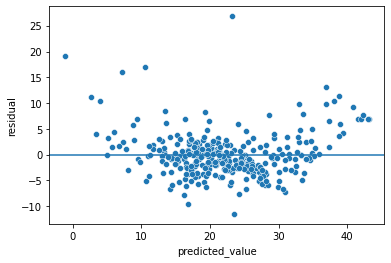

In [143]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_df_train)
print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

# calculate residuals
residual = y_df_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

#### Assumption:

* Linear relationship
* Not have constant variance
* Independent observation

### Training Error

In [139]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_df_train)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('Normalized RMSE for traning data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))/(max(y_df_train)-min(y_df_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

R-squared for training data is 0.7681075346375392
RMSE for training data is 4.262087229222339
Normalized RMSE for traning data is 0.0947130495382742
MAE for training data is 2.931599693553999
MAPE for training data is 0.1529955114265237


#### Interpretation:

* 76.81% data berhasil diprediksi oleh model
* Skor RMSE dari model ini pada training data berada di kisaran 4.26, atau setelah dinormalisasi dengan range data adalah sekitar 0.0947 atau sekitar 9.47%. Skor ini tentu masih cukup tinggi sehingga bisa dibilang bahwa akurasi model tidak terlalu tinggi.
* Skor MAE yang berada di sekitar 2.93 juga termasuk cukup tinggi, atau dalam MAPE 15.3% rasio error dengan nilai asli juga menunjukkan akurasi model yang tidak terlalu baik.

### Testing Error

In [140]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = lasso_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('R-squared for training data is {}'.format(r2_score(y_df_test, y_predict_test)))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('Normalized RMSE for traning data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))/(max(y_df_test)-min(y_df_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

R-squared for training data is 0.614358417408511
RMSE for testing data is 5.648570410262554
Normalized RMSE for traning data is 0.13197594416501296
MAE for testing data is 3.7035163579764245
MAPE for testing data is 0.17650773918578624


#### Interpretation:

* Hanya 61.44% nilai data yang berhasil diprediksi oleh model.
* Skor RMSE model ini pada testing data 5.6 atau setelah dinormalisasikan berkisar pada nilai 13.2%. Skor ini tentu lebih tinggi dari hasil yang diperoleh pada training data dan akurasi yang rendah.
* Nilai MAE 3.7 dan MAPE 17.65% juga mencerminkan akurasi model yang rendah.
* Akurasi pada testing data secara umum mempunyai perbedaan yang signifikan dari training data. Hal ini menunjukkan model yang dibangun overfitting.